<a href="https://colab.research.google.com/github/kimalaacer/PyTorch-for-Deep-Learning-and-Computer-Vision/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [0]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5,-0.5]]
x,y= datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)

x_data=torch.tensor(x)
y_data=torch.tensor(y.reshape(100, 1))

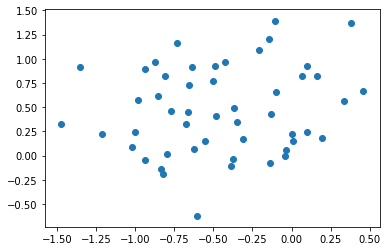

In [3]:
plt.scatter(x[y==0, 0], x[y==0, 1])

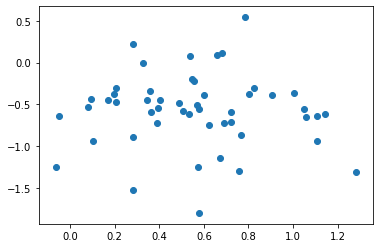

In [4]:
plt.scatter(x[y==1, 0], x[y==1, 1])

In [0]:
def scatter_plot():
  plt.scatter(x[y==0, 0], x[y==0, 1])
  plt.scatter(x[y==1, 0], x[y==1, 1])

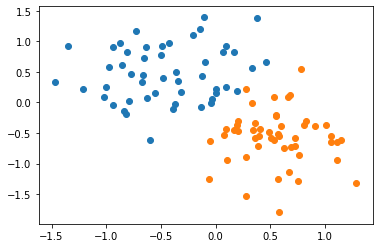

In [6]:
scatter_plot()

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
 # we use super to inherit from class
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred
  def predict(self, x):
    pred=self.forward(x)
    if pred >=0.5:
      return 1
    else:
      return 0

In [8]:
torch.manual_seed(2)
model = Model(2, 1)

print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [9]:
[w,b] = model.parameters()
w1, w2 = w.view(2)
b1=b[0]
print (w1.item(),w2.item(), b1.item())

def get_params():
  return (w1.item(),w2.item(), b[0].item())


0.16220331192016602 -0.1682732105255127 0.19390898942947388


In [0]:
def plot_fit(title):
  plt.title = title
  w1,w2, b1 = get_params()
  x1 = np.array([-2, 2])
  x2= (w1 * x1 + b1)/-w2
  scatter_plot()
  plt.plot(x1, x2, 'r')
 


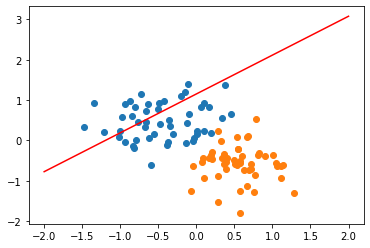

In [11]:
plot_fit('Initial Model')

In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

BCE: is for Binary Cross Entropy loss function

In [13]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data.float())
  loss = criterion(y_pred, y_data.float())
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


epoch: 0 loss: 0.6185115575790405
epoch: 1 loss: 0.6174639463424683
epoch: 2 loss: 0.6164201498031616
epoch: 3 loss: 0.6153794527053833
epoch: 4 loss: 0.614342451095581
epoch: 5 loss: 0.6133086681365967
epoch: 6 loss: 0.6122783422470093
epoch: 7 loss: 0.6112515330314636
epoch: 8 loss: 0.6102280616760254
epoch: 9 loss: 0.6092080473899841
epoch: 10 loss: 0.6081910729408264
epoch: 11 loss: 0.6071775555610657
epoch: 12 loss: 0.606167733669281
epoch: 13 loss: 0.6051608920097351
epoch: 14 loss: 0.604157567024231
epoch: 15 loss: 0.6031574606895447
epoch: 16 loss: 0.602160632610321
epoch: 17 loss: 0.6011670827865601
epoch: 18 loss: 0.6001767516136169
epoch: 19 loss: 0.599189817905426
epoch: 20 loss: 0.5982059240341187
epoch: 21 loss: 0.5972254276275635
epoch: 22 loss: 0.5962479114532471
epoch: 23 loss: 0.5952739119529724
epoch: 24 loss: 0.5943028926849365
epoch: 25 loss: 0.5933352112770081
epoch: 26 loss: 0.5923705101013184
epoch: 27 loss: 0.5914090275764465
epoch: 28 loss: 0.5904508829116821


Text(0.5, 0, 'Epoch')

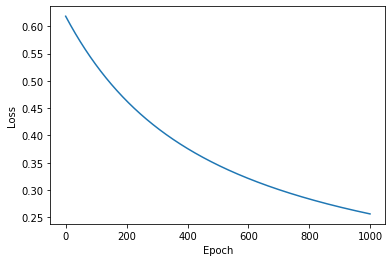

In [14]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

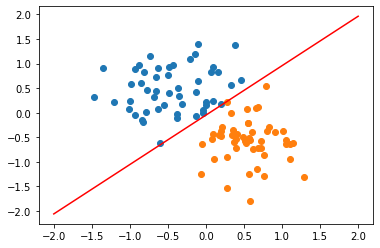

In [15]:
plot_fit("Trained Model")

model testing:

Red point positive probability=0.9424158334732056
Black point positive probability=0.05055497586727142
Red point in class=1
Black point in class=0


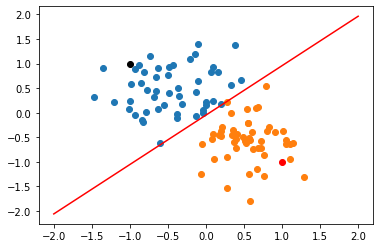

In [16]:
point1=torch.Tensor([1.0,-1.0])
point2=torch.Tensor([-1.0,1.0])
plt.plot(point1[0], point1[1], 'ro')
plt.plot(point2[0], point2[1], 'ko')
print("Red point positive probability={}".format(model.forward(point1).item()))
print("Black point positive probability={}".format(model.forward(point2).item()))

print("Red point in class={}".format(model.predict(point1)))
print("Black point in class={}".format(model.predict(point2)))
plot_fit("Trained Model")
